In [1]:
import pandas as pd
import numpy as np
import glob, os

from seahorse import Graph
from seahorse import constants
constants.SHOWMODE = True

cpal = ["#90ee90", "#6495ed", "#ca472f", "#f6c85f", "#6f4e7c", "#ffa056", "#558254", "#4ad9e1"]
cdef = "#9dbcd4"

## Supplementary figure 8.B

In [2]:
# SPMP

fname = '../tables/subjects_metadata.tsv'
smdata = pd.read_csv(fname, sep='\t', index_col=0)
eth = smdata.set_index('Subject')['Ethnicity'].to_dict()

fname = '../tables/bracken_self_combine_result.tsv.gz'
spmp = pd.read_csv(fname, sep='\t', index_col=0, compression='gzip')

spmp_all = spmp.copy()
spmp_all['group'] = 'SPMP'

spmp_eth = spmp.copy()
spmp_eth['group'] = spmp_eth['sample'].map(eth)

# Western

fname = '../tables/bracken_western_combine_result.tsv.gz'
western = pd.read_csv(fname, sep='\t', index_col=0, compression='gzip')
western['group'] = 'Non\nSingaporeans'

fname = '../tables/mags_info_hybrid.tsv'
minfo = pd.read_csv(fname, sep='\t', index_col=0)
minfo['name'] = minfo['name'] + '.fasta'
slcid = minfo.set_index('name')['SLCID'].to_dict()

df = pd.concat([spmp_all, spmp_eth, western])
df = df[df['rank'] == 'S']
df['SLCID'] = df['name'].map(slcid)

df

,abundance,#covered,#assigned,rank,taxid,name,sample,group,SLCID
3,7.64,1949691,1949691,S,2820084,SPMP45_bin.219.fasta,SPMP16,SPMP,566
4,7.27,1856540,1856540,S,2820142,SPMP41_bin.4.fasta,SPMP16,SPMP,95
5,4.02,1026468,1026468,S,2820015,SPMP06_bin.94.fasta,SPMP16,SPMP,54
6,3.86,985317,985317,S,2820217,SPMP07_bin.56.fasta,SPMP16,SPMP,20
7,3.75,957301,957301,S,2820436,SPMP15_bin.16.fasta,SPMP16,SPMP,50
...,...,...,...,...,...,...,...,...,...
639,0.00,10,10,S,2820346,SPMP31_bin.46.fasta,SRR1952058,Non\nSingaporeans,622
640,0.00,10,10,S,2820520,SPMP12_bin.33.fasta,SRR1952058,Non\nSingaporeans,677
641,0.00,10,10,S,2820336,SPMP13_bin.81.fasta,SRR1952058,Non\nSingaporeans,223
642,0.00,10,10,S,2820535,SPMP65_bin.71.fasta,SRR1952058,Non\nSingaporeans,305


<ipython-input-3-5308341089ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc612['group'] = pd.Categorical(slc612['group'].str.strip(),


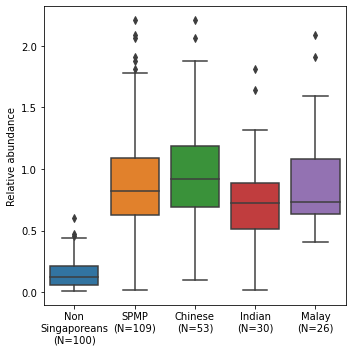

In [3]:
slc612 = df[df['SLCID'] == 612]

slc612['group'] = pd.Categorical(slc612['group'].str.strip(),
                                 categories=['Non\nSingaporeans', 'SPMP', 'Chinese', 'Indian', 'Malay'])

graph = Graph(slc612)
graph.sns.boxplot(x='group', y='abundance')

graph.ax.set_ylabel('Relative abundance')
graph.ax.set_xlabel('')
graph.add_xticks_ncount('group')

graph.set_size_inches(5, 5)
graph.tight_layout()